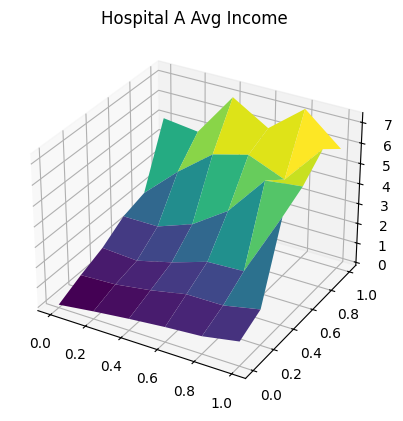

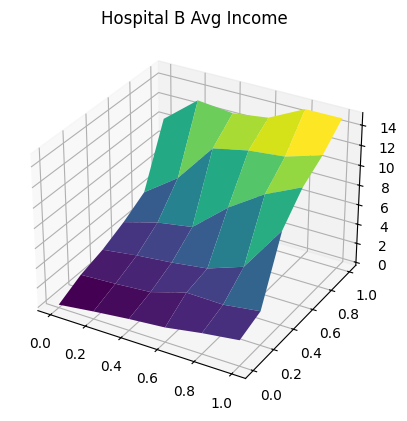

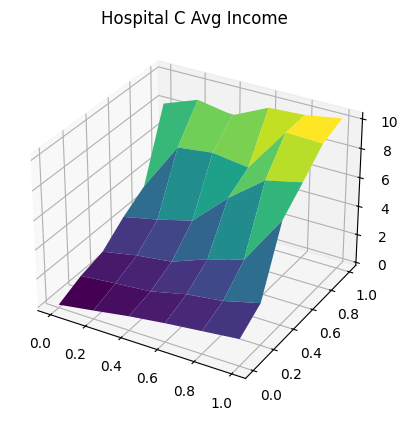

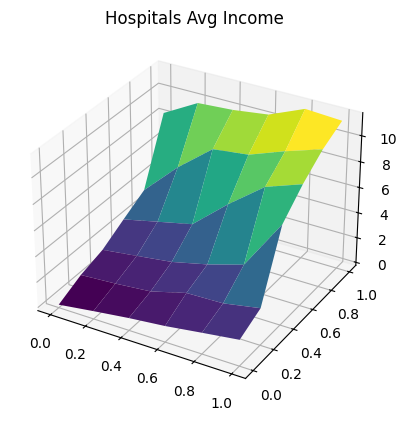

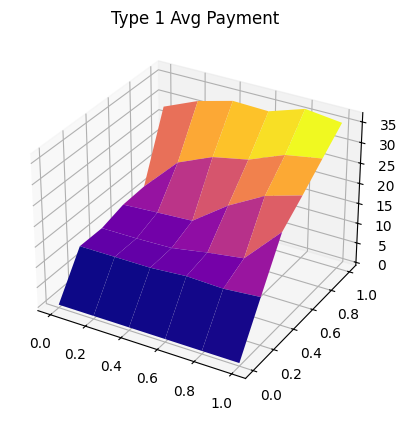

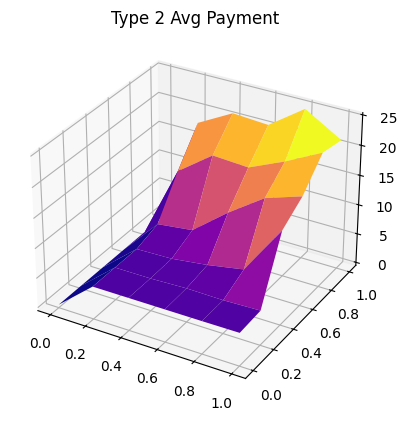

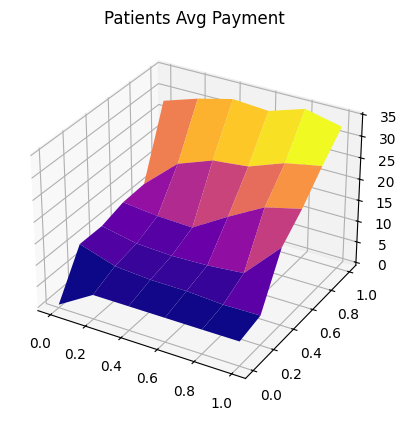

In [5]:
!pip install sympy tqdm matplotlib

import numpy as np
import sympy as sp
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

nA, nB, nC = 2, 4, 3
landa = [0.1, 0.2]
N = 500
stride = 5


nABC_template = np.zeros((nA + nB + nC, 2))
nABC_template[:nA, 0] = 1
nABC_template[nA:nA + nB, 0] = 2
nABC_template[nA + nB:, 0] = 3


t = sp.Symbol('t', real=True, positive=True)
f1 = landa[0] * sp.exp(-landa[0] * t)
f2 = landa[1] * sp.exp(-landa[1] * t)
c1 = t - (1 - sp.integrate(f1, (t, 0, t))) / f1
c2 = t - (1 - sp.integrate(f2, (t, 0, t))) / f2
x_sym = sp.Symbol('x', real=True, positive=True)

def c1_inv_numeric(y_val):
    return float(sp.nsolve(sp.Eq(c1.subs(t, x_sym), y_val), x_sym, max(y_val, 0.1)))

def c2_inv_numeric(y_val):
    return float(sp.nsolve(sp.Eq(c2.subs(t, x_sym), y_val), x_sym, max(y_val, 0.1)))


def simulate_once(p1, p2):
    patients = []
    nABC = nABC_template.copy()
    hospitals_income = np.zeros(3)
    patients_payment = np.zeros(2)
    number_of_patients = np.zeros(2)

    for _ in range(N):

        if random.random() < p1:
            val = np.random.exponential(1 / landa[0])
            patients.append([1, val, float(c1.subs(t, val))])
        if random.random() < p2:
            val = np.random.exponential(1 / landa[1])
            patients.append([2, val, float(c2.subs(t, val))])

        patients.sort(key=lambda x: x[2], reverse=True)

        empty_beds = np.where(nABC[:, 1] == 0)[0]
        np.random.shuffle(empty_beds)
        temp_patients = [p for p in patients if p[2] > 0]

        edgeC = temp_patients[len(empty_beds)] [2] if len(temp_patients) > len(empty_beds) else 0
        last = min(len(empty_beds), len(temp_patients))

        for j in range(last):
            if temp_patients[j][0] == 1:
                edge_value = c1_inv_numeric(edgeC)
                number_of_patients[0] += 1
            else:
                edge_value = c2_inv_numeric(edgeC)
                number_of_patients[1] += 1

            hosp_id = int(nABC[empty_beds[j], 0]) - 1
            hospitals_income[hosp_id] += edge_value
            patients_payment[temp_patients[j][0] - 1] += edge_value
            nABC[empty_beds[j], 1] = temp_patients[j][0]

        patients = patients[last:]

        for j in range(nABC.shape[0]):
            if nABC[j, 1] != 0 and random.random() < 1 - np.exp(-landa[int(nABC[j, 1]) - 1]):
                nABC[j, 1] = 0


        for idx in range(len(patients)):
            if patients[idx][0] == 1:
                val = np.random.exponential(1 / landa[0])
                patients[idx] = [1, val, float(c1.subs(t, val))]
            else:
                val = np.random.exponential(1 / landa[1])
                patients[idx] = [2, val, float(c2.subs(t, val))]

        patients.sort(key=lambda x: x[2], reverse=True)


    hospitals_income /= N
    avg_payment = np.zeros(2)
    avg_payment[0] = patients_payment[0] / number_of_patients[0] if number_of_patients[0] > 0 else 0
    avg_payment[1] = patients_payment[1] / number_of_patients[1] if number_of_patients[1] > 0 else 0

    return hospitals_income, avg_payment, number_of_patients


size = stride + 1
hospitals_income_matrix = np.zeros((size, size, 4))
patients_payment_matrix = np.zeros((size, size, 3))

p_values = np.linspace(0, 1, size)
for i, p1 in enumerate(p_values):
    for j, p2 in enumerate(p_values):
        hosp_inc, avg_pay, num_pat = simulate_once(p1, p2)
        hospitals_income_matrix[i, j, :3] = hosp_inc
        patients_payment_matrix[i, j, 0:2] = avg_pay
        patients_payment_matrix[i, j, 2] = (
            (avg_pay[0] * num_pat[0] + avg_pay[1] * num_pat[1]) / sum(num_pat)
            if sum(num_pat) > 0 else 0
        )

hospitals_income_matrix[:, :, 3] = (
    hospitals_income_matrix[:, :, 0] * nA +
    hospitals_income_matrix[:, :, 1] * nB +
    hospitals_income_matrix[:, :, 2] * nC
) / (nA + nB + nC)


X, Y = np.meshgrid(p_values, p_values)
titles_hosp = ['Hospital A Avg Income', 'Hospital B Avg Income', 'Hospital C Avg Income', 'Hospitals Avg Income']
titles_pat = ['Type 1 Avg Payment', 'Type 2 Avg Payment', 'Patients Avg Payment']

for k in range(4):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, hospitals_income_matrix[:, :, k], cmap='viridis')
    ax.set_title(titles_hosp[k])

for k in range(3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, patients_payment_matrix[:, :, k], cmap='plasma')
    ax.set_title(titles_pat[k])

plt.show()


شروع شبیه‌سازی روی شبکه p1 و p2...


100%|██████████| 11/11 [00:19<00:00,  1.81s/it]


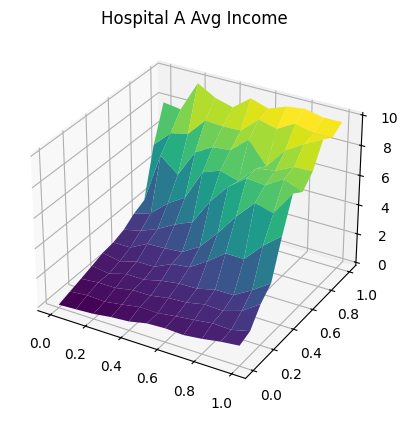

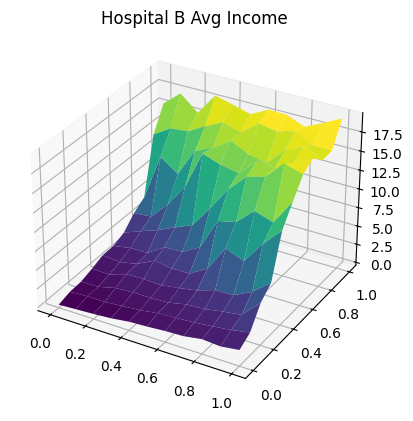

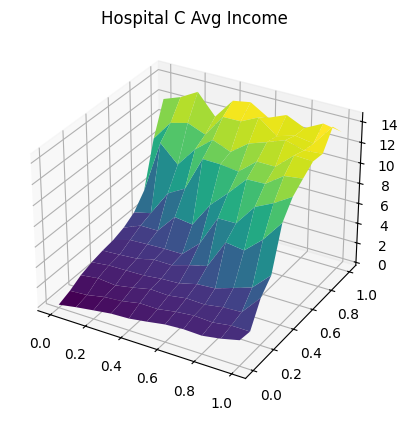

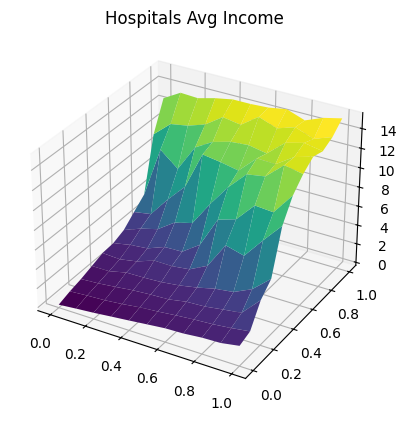

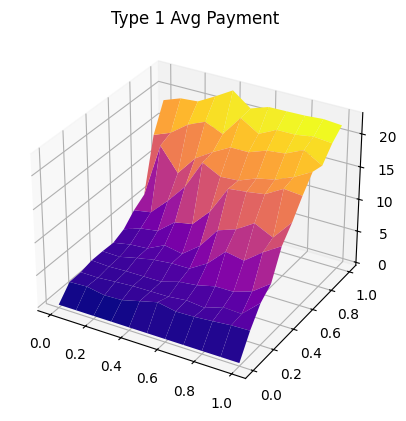

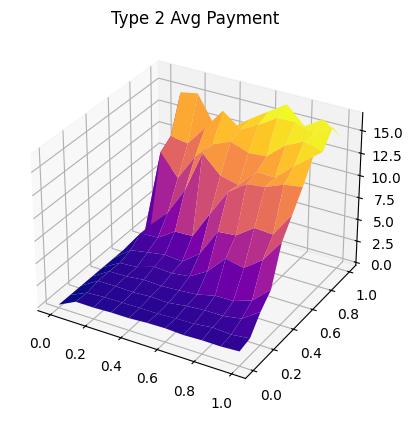

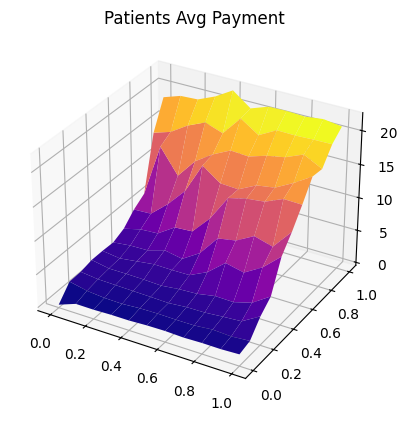

In [7]:

!pip install sympy tqdm matplotlib numpy

import numpy as np
import sympy as sp
from sympy import exp, sqrt
import random
import matplotlib.pyplot as plt
from tqdm import tqdm


t = sp.Symbol('t', real=True, positive=True)


c1 = 1 - sp.exp(-t)
c2 = sp.sqrt(t) / (1 + t)


def c1_inv_numeric(y_val):
    x = sp.Symbol('x', real=True, positive=True)

    return float(sp.nsolve(sp.Eq(1 - sp.exp(-x), y_val), x, 0.5))


def c2_inv_numeric(y_val):
    x = sp.Symbol('x', real=True, positive=True)
    return float(sp.nsolve(sp.Eq(sp.sqrt(x)/(1 + x), y_val), x, 0.5))


nA, nB, nC = 2, 4, 3
pa, pb, pc = 0.2, 0.3, 0.5
landa = [0.1, 0.2]
stride = 10


base_percent = np.array([0.8, 0.5, 0.2])
percents = np.zeros((3,3))
for i in range(3):
    percents[i,:] = np.roll(base_percent, i)


nABC = np.zeros((nA + nB + nC, 2), dtype=int)
for i in range(nA + nB + nC):
    if i < nA:
        nABC[i,0] = 1
    elif i < nA + nB:
        nABC[i,0] = 2
    else:
        nABC[i,0] = 3


def sort_patients(patients):

    return sorted(patients, key=lambda x: x[2], reverse=True)


def simulate_once(p1, p2, N=100):
    patients = []
    hospitalsIncome = np.zeros(3)
    patientsPayment = np.zeros(2)
    numberOfPatients = np.zeros(2, dtype=int)

    for _ in range(N):

        if random.random() < p1:
            value = np.random.exponential(1 / landa[0])
            insuranceR1 = random.random()
            if insuranceR1 < pa:
                ins_type = 1
            elif insuranceR1 < pa + pb:
                ins_type = 2
            else:
                ins_type = 3
            patients.append([1, ins_type, value])
            patients = sort_patients(patients)


        if random.random() < p2:
            value = np.random.exponential(1 / landa[1])
            insuranceR2 = random.random()
            if insuranceR2 < pa:
                ins_type = 1
            elif insuranceR2 < pa + pb:
                ins_type = 2
            else:
                ins_type = 3
            patients.append([2, ins_type, value])
            patients = sort_patients(patients)

        emptyBeds = [idx for idx, bed in enumerate(nABC[:,1]) if bed == 0]
        n = np.zeros(3, dtype=int)
        for idx in emptyBeds:
            n[nABC[idx,0] - 1] += 1


        counter = min(len(emptyBeds), len(patients))
        for j in range(counter):
            pat = patients[j]

            if pat[0] == 1:
                numberOfPatients[0] += 1
            else:
                numberOfPatients[1] += 1


            if pat[1] == 1:
                temp = np.roll(emptyBeds, n.sum())
            elif pat[1] == 2:
                temp = np.roll(emptyBeds, n[1] + n[2])
            else:
                temp = np.roll(emptyBeds, n[2])

            matchedBed = temp[0]
            emptyBeds = list(filter(lambda x: x != matchedBed, emptyBeds))
            n[nABC[matchedBed,0] - 1] -= 1

            percent = percents[pat[1]-1, nABC[matchedBed,0]-1]
            hospitalsIncome[nABC[matchedBed,0]-1] += pat[2]
            patientsPayment[pat[0]-1] += pat[2] * (1 - percent)
            nABC[matchedBed,1] = pat[0]


        patients = patients[counter:]


        for j in range(len(nABC)):
            if nABC[j,1] != 0 and random.random() < 1 - np.exp(-landa[nABC[j,1]-1]):
                nABC[j,1] = 0

        for j in range(len(patients)):
            if patients[j][0] == 1:
                value = np.random.exponential(1 / landa[0])
                patients[j][2] = value
            else:
                value = np.random.exponential(1 / landa[1])
                patients[j][2] = value
        patients = sort_patients(patients)


    hospitalsIncome /= N
    if numberOfPatients[0] != 0:
        patientsPayment[0] /= numberOfPatients[0]
    else:
        patientsPayment[0] = 0
    if numberOfPatients[1] != 0:
        patientsPayment[1] /= numberOfPatients[1]
    else:
        patientsPayment[1] = 0

    return hospitalsIncome, patientsPayment, numberOfPatients


size = stride + 1
p_values = np.linspace(0, 1, size)
hospitals_income_matrix = np.zeros((size, size, 4))
patients_payment_matrix= np.zeros((size, size, 3))


for i, p1 in enumerate(tqdm(p_values)):
    for j, p2 in enumerate(p_values):
        hospInc, pay, numPat = simulate_once(p1, p2, N=1000)
        hospitals_income_matrix[i, j, :3] = hospInc

        hospitals_income_matrix[i, j, 3] = (hospInc[0]*nA + hospInc[1]*nB + hospInc[2]*nC) / (nA + nB + nC)
        patients_payment_matrix[i, j, 0] = pay[0] if numPat[0] != 0 else 0
        patients_payment_matrix[i, j, 1] = pay[1] if numPat[1] != 0 else 0
        patients_payment_matrix[i, j, 2] = (pay[0]*numPat[0] + pay[1]*numPat[1]) / sum(numPat) if sum(numPat) != 0 else 0

X, Y = np.meshgrid(p_values, p_values)
titles_hosp = ['Hospital A Avg Income', 'Hospital B Avg Income', 'Hospital C Avg Income', 'Hospitals Avg Income']
titles_pat = ['Type 1 Avg Payment', 'Type 2 Avg Payment', 'Patients Avg Payment']

for k in range(4):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, hospitals_income_matrix[:, :, k], cmap='viridis')
    ax.set_title(titles_hosp[k])

for k in range(3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, patients_payment_matrix[:, :, k], cmap='plasma')
    ax.set_title(titles_pat[k])

plt.show()
